### 1. Installed the Quandl library and registered for a Quandl account.

In [45]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

### 2. Imported the data set.

In [7]:
df_movies=pd.read_csv(r"P:\CarrerFoundy\Data Immersion (deep learning)\Exercise 6\Execrise 6.1\Clean Data Set\Movies.csv")

### 3. A subset of the data set.

In [16]:
# Subset the data to exclude irrelevant historical data (e.g., older than 2000) and remove forecasted data
df_subset = df_movies[(df_movies['Year'] >= 2000) ]

# Resetting the index after subsetting
df_subset.reset_index(drop=True, inplace=True)

# Setting the 'Date' column as the new index, if it exists
if 'Date' in df_subset.columns:
    df_subset.set_index('Date', inplace=True)

# Display the first few rows of the subset
df_subset.head()


,Unnamed: 0,Title,Release Date,Year,Color/B&W,Genre,Language,Country,Geo Area,Rating,...,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget
0,1036,102 Dalmatians,7/8/2000,2000,Color,Adventure,English,USA,North America,G,...,Kevin Lima,2000,4182,36,372,4.8,84,100,66941559,85000000
1,1037,28 Days,7/23/2000,2000,Color,Comedy,English,USA,North America,PG,...,Betty Thomas,12000,23864,84,0,6.0,116,103,37035515,43000000
2,1038,3 Strikes,11/5/2000,2000,Color,Comedy,English,USA,North America,R,...,DJ Pooh,939,3354,69,118,4.0,22,82,9821335,6000000
3,1039,Aberdeen,2/11/2000,2000,Color,Drama,English,UK,Europe,NaN,...,Hans Petter Moland,844,846,19,260,7.3,28,106,64148,6500000
4,1040,All the Pretty Horses,3/14/2000,2000,Color,Drama,English,USA,North America,PG,...,Billy Bob Thornton,13000,15006,0,652,5.8,85,220,15527125,57000000


### Data older than the year 2000 was removed as it may not be relevant to the current trends and analyses. Historical events prior to this timeframe might introduce bias due to outdated audience preferences or market conditions.

### 4. Created a line chart.

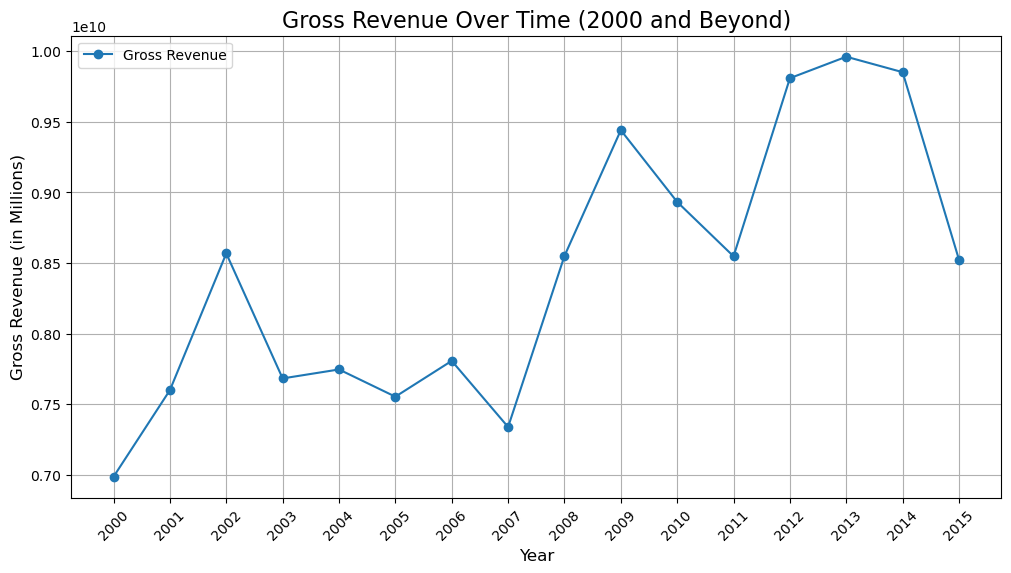

In [26]:
# Subset data by year and gross revenue
df_subset = df_movies[df_movies['Year'] >= 2000]  # Filter for movies released in or after 2000

# Aggregate gross revenue by year (optional step to group by year if multiple entries per year exist)
df_aggregated = df_subset.groupby('Year')['Gross Revenue'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated['Year'], df_aggregated['Gross Revenue'], marker='o', label='Gross Revenue')
plt.title('Gross Revenue Over Time (2000 and Beyond)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gross Revenue (in Millions)', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(df_aggregated['Year'], rotation=45)  # Rotate x-axis labels if needed
plt.show()


### 5.Decomposed the data’s components.

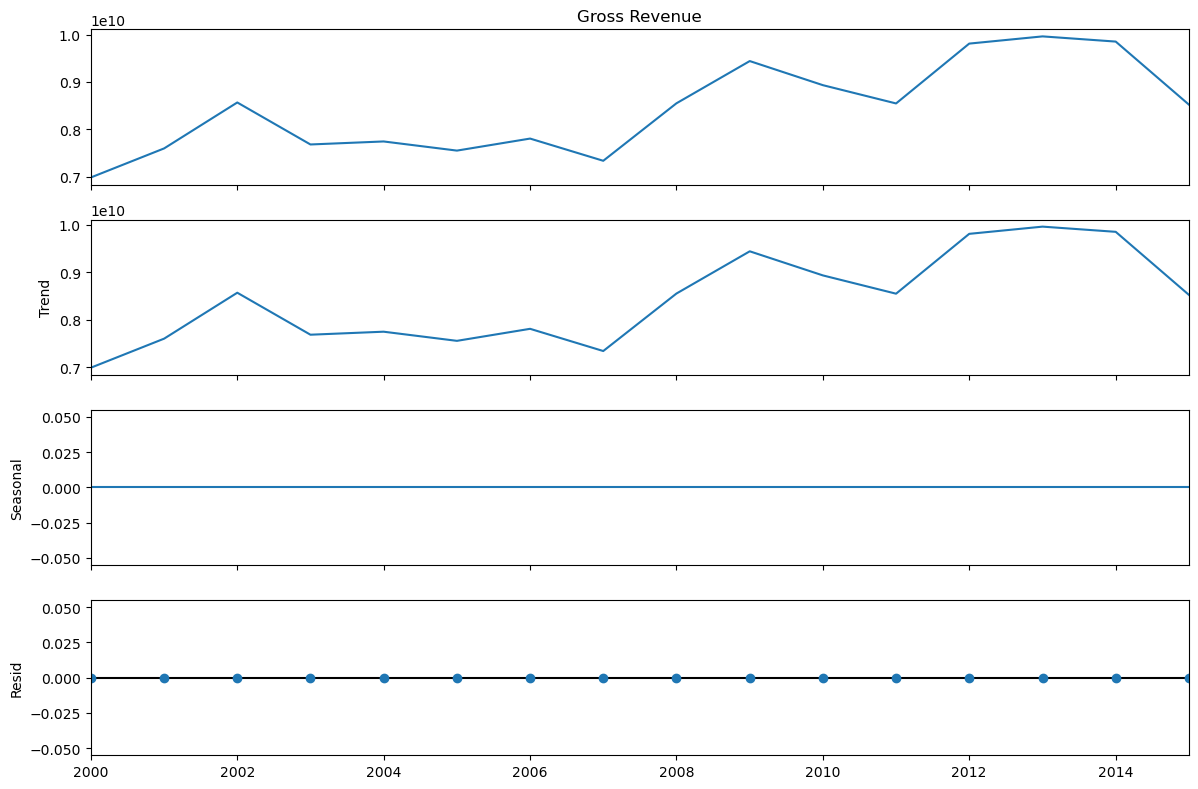

In [30]:
# Assuming 'df_aggregated' contains the 'Year' as the index and 'Gross_Revenue' as the value to decompose
# Ensure the index is a datetime or period index for decomposition
df_aggregated['Year'] = pd.to_datetime(df_aggregated['Year'], format='%Y')
df_aggregated.set_index('Year', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_aggregated['Gross Revenue'], model='additive', period=1)

# Plot decomposition
plt.rcParams.update({'figure.figsize': (12, 8)})
decomposition.plot()
plt.show()

### Breakdown of gross revenue into these components helps identify:

 ###   Long-term industry trends.
 ###   Impact of specific time periods on revenue.
 ###   Unexplained variations or anomalies for further investigation.

### 6. Conducted a Dickey-Fuller test.

In [35]:
# Perform Dickey-Fuller test on the Gross_Revenue column
result = adfuller(df_aggregated['Gross Revenue'])

# Display the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.0425418703235967
p-value: 0.26823693287853134
Critical Values:
   1%: -3.9644434814814815
   5%: -3.0849081481481484
   10%: -2.6818144444444445


### In such cases, the p-value is generally given precedence because it provides a probabilistic measure of the evidence against the null hypothesis. Since the p-value is greater than 0.05. We fail to reject the null hypothesis. The series is considered non-stationary based on the p-value.

### 7. Conducted a round of  Dickey-Fuller test.

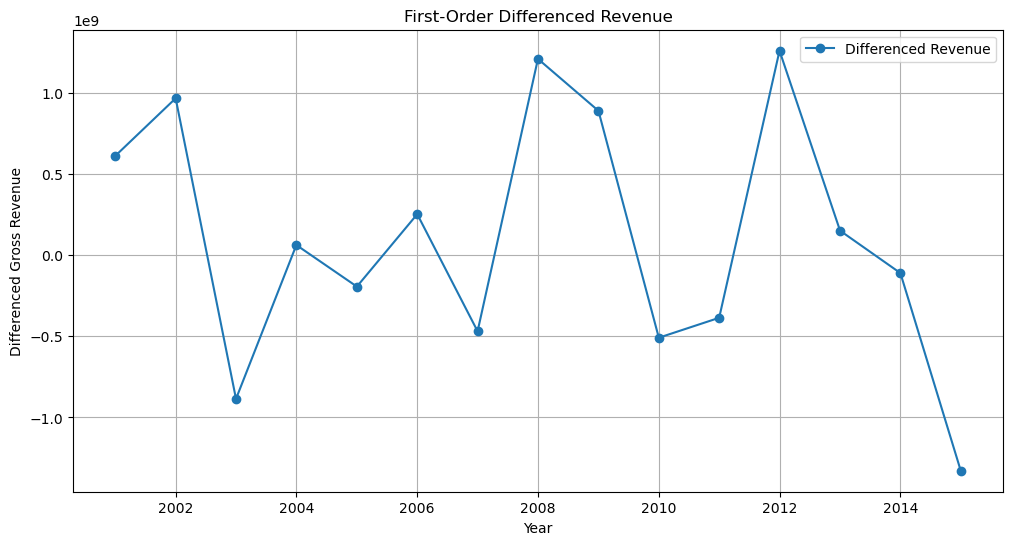

ADF Statistic (Differenced Data): -2.089290429104976
p-value (Differenced Data): 0.24884272255960088
Critical Values (Differenced Data):
   1%: -4.473135048010974
   5%: -3.28988060356653
   10%: -2.7723823456790124


In [39]:
# Apply first-order differencing
df_aggregated['Differenced_Revenue'] = df_aggregated['Gross Revenue'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated['Differenced_Revenue'], label='Differenced Revenue', marker='o')
plt.title('First-Order Differenced Revenue')
plt.xlabel('Year')
plt.ylabel('Differenced Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Conduct the ADF test on the differenced data
result_diff = adfuller(df_aggregated['Differenced_Revenue'].dropna())

# Display the results
print("ADF Statistic (Differenced Data):", result_diff[0])
print("p-value (Differenced Data):", result_diff[1])
print("Critical Values (Differenced Data):")
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')

### This is as like the previous one, the p-value is generally given precedence because it provides a probabilistic measure of the evidence against the null hypothesis. Since the p-value is greater than 0.05. We fail to reject the null hypothesis. The series is considered non-stationary based on the p-value.

### 8. Performed another round of the Dickey-Fuller test.

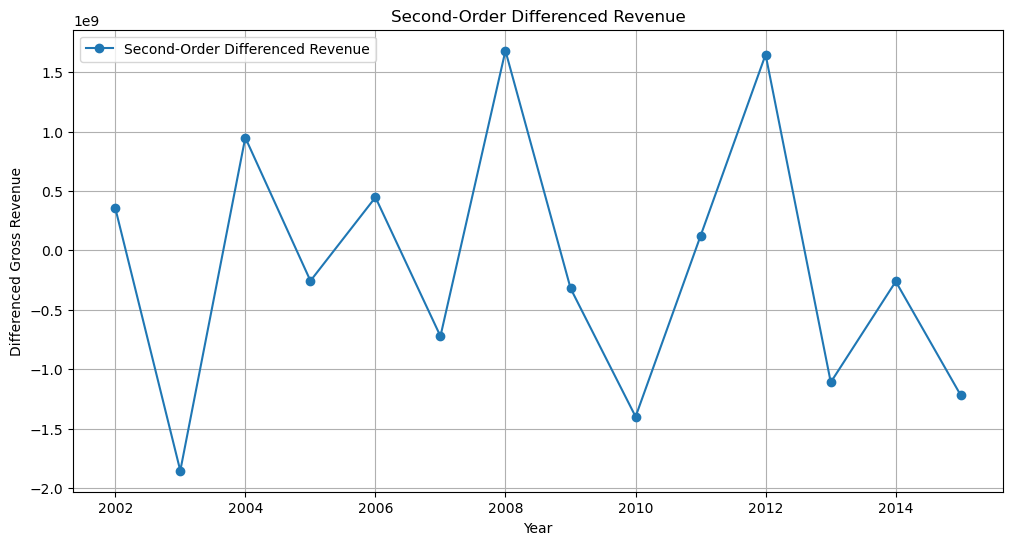

ADF Statistic (Second Differenced Data): -3.8084892534798005
p-value (Second Differenced Data): 0.0028216433289725614
Critical Values (Second Differenced Data):
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603


In [42]:
# Apply second-order differencing
df_aggregated['Second_Differenced_Revenue'] = df_aggregated['Gross Revenue'].diff().diff().dropna()

# Plot the second-order differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated['Second_Differenced_Revenue'], label='Second-Order Differenced Revenue', marker='o')
plt.title('Second-Order Differenced Revenue')
plt.xlabel('Year')
plt.ylabel('Differenced Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Conduct the ADF test on the second-order differenced data
result_second_diff = adfuller(df_aggregated['Second_Differenced_Revenue'].dropna())

# Display the results
print("ADF Statistic (Second Differenced Data):", result_second_diff[0])
print("p-value (Second Differenced Data):", result_second_diff[1])
print("Critical Values (Second Differenced Data):")
for key, value in result_second_diff[4].items():
    print(f'   {key}: {value}')


### The p-value is less than 0.05 and the ADF statistic is less than the critical values, we reject Null Hypotheses​. This means the gross revenue data is stationary.

### 9. Data’s autocorrelation.

Length of differenced data: 15


<Figure size 1200x600 with 0 Axes>

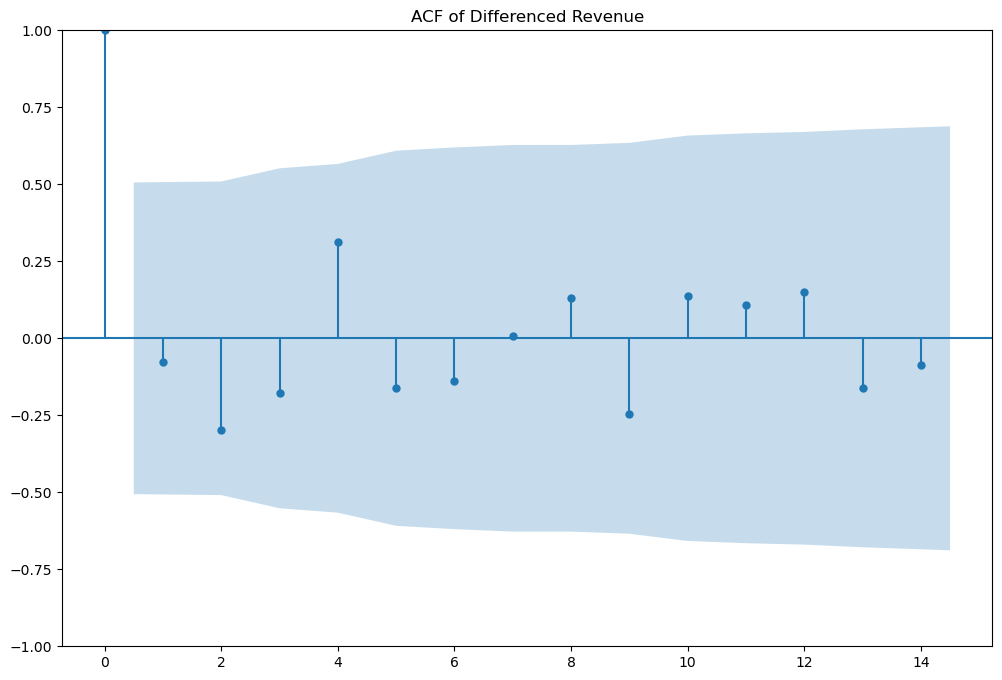

In [56]:
# Remove NaN values from the differenced data
differenced_data = df_aggregated['Differenced_Revenue'].dropna()

# Check the length of differenced data
print(f"Length of differenced data: {len(differenced_data)}")

# Adjust the number of lags if the data length is smaller than the lag value
lags = min(20, len(differenced_data) - 1)  # Adjust lag to fit data length

# Plot the ACF for the differenced data with adjusted lags
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(differenced_data, lags=lags, title="ACF of Differenced Revenue")
plt.show()


